In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data
latencies = pd.read_csv("results_01.csv").set_index("i")

In [ ]:
def plot_latencies(ltc_type: str):
    

# Append Latency

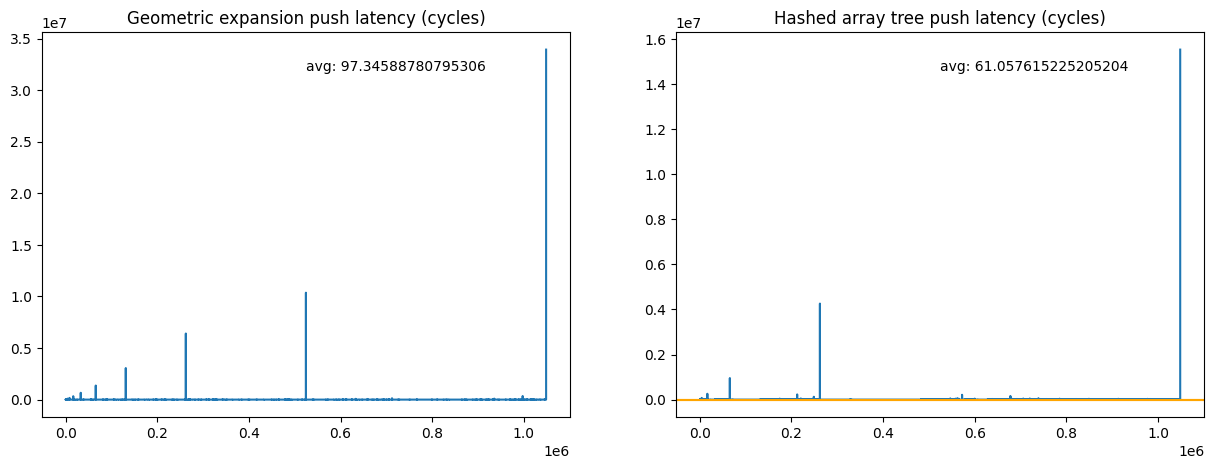

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 5))

ax1.plot(latencies["double_push"])
ax1.set_title("Geometric expansion push latency (cycles)")
ax1.axhline(latencies["double_scan"].mean(), color="orange")
ax1.text(0.5, 0.9, f'avg: {latencies["double_push"].mean()}', transform=ax2.transAxes)

ax2.plot(latencies["hat_push"])
ax2.set_title("Hashed array tree push latency (cycles)")
ax2.axhline(latencies["hat_push"].mean(), color="orange")
ax2.text(0.5, 0.9, f'avg: {latencies["hat_push"].mean()}', transform=ax3.transAxes)

ax3.plot(latencies["hat_push"])
ax3.set_title("Hashed array tree push latency (cycles)")
ax3.axhline(latencies["hat_push"].mean(), color="orange")
ax3.text(0.5, 0.9, f'avg: {latencies["hat_push"].mean()}', transform=ax3.transAxes)

ax2.plot(latencies["hat_push"])
ax2.set_title("Hashed array tree push latency (cycles)")
ax2.axhline(latencies["hat_push"].mean(), color="orange")
ax2.text(0.5, 0.9, f'avg: {latencies["hat_push"].mean()}', transform=ax3.transAxes)

fig.savefig("../report/graphics/01-push-latencies.png", bbox_inches='tight')

# Access Latency

The difference between this one and the next one is that this is random access. The next one is ordered left to right.

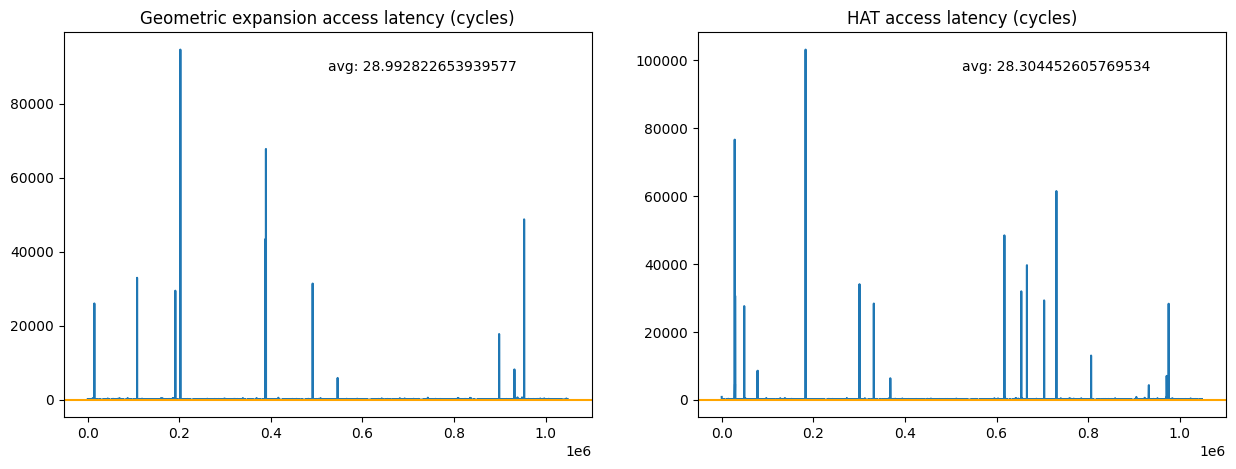

In [4]:
fig, ((ax2, ax3)) = plt.subplots(1, 2, figsize=(15, 5))
# fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

# ax1.plot(latencies["alpha_get"])
# ax1.set_title("Built-in Vec access latency (cycles)")

ax2.plot(latencies["double_get"])
ax2.set_title("Geometric expansion access latency (cycles)")
ax2.axhline(latencies["double_get"].mean(), color="orange")
ax2.text(0.5, 0.9, f'avg: {latencies["double_get"].mean()}', transform=ax2.transAxes)

ax3.plot(latencies["hat_get"])
ax3.set_title("HAT access latency (cycles)")
ax3.axhline(latencies["hat_get"].mean(), color="orange")
ax3.text(0.5, 0.9, f'avg: {latencies["hat_get"].mean()}', transform=ax3.transAxes)


fig.savefig("../report/graphics/01-access-latencies.png", bbox_inches='tight')

# Scan Latency

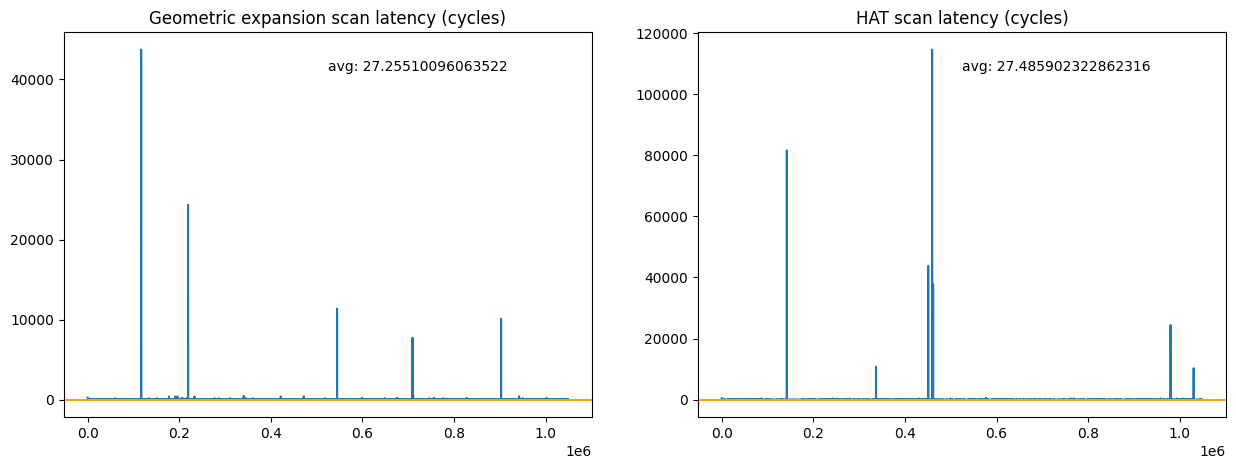

In [5]:
fig, ((ax2, ax3)) = plt.subplots(1, 2, figsize=(15, 5))
# fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

# ax1.plot(latencies["alpha_scan"])
# ax1.set_title("Built-in Vec scan latency (cycles)")

ax2.plot(latencies["double_scan"])
ax2.set_title("Geometric expansion scan latency (cycles)")
ax2.axhline(latencies["double_scan"].mean(), color="orange")
ax2.text(0.5, 0.9, f'avg: {latencies["double_scan"].mean()}', transform=ax2.transAxes)

ax3.plot(latencies["hat_scan"])
ax3.set_title("HAT scan latency (cycles)")
ax3.axhline(latencies["double_scan"].mean(), color="orange")
ax3.text(0.5, 0.9, f'avg: {latencies["hat_scan"].mean()}', transform=ax3.transAxes)

fig.savefig("../report/graphics/01-scan-throughput.png", bbox_inches='tight')

# Overall Throughput

In [6]:
latencies = pd.read_csv("results_02.csv").set_index("i")

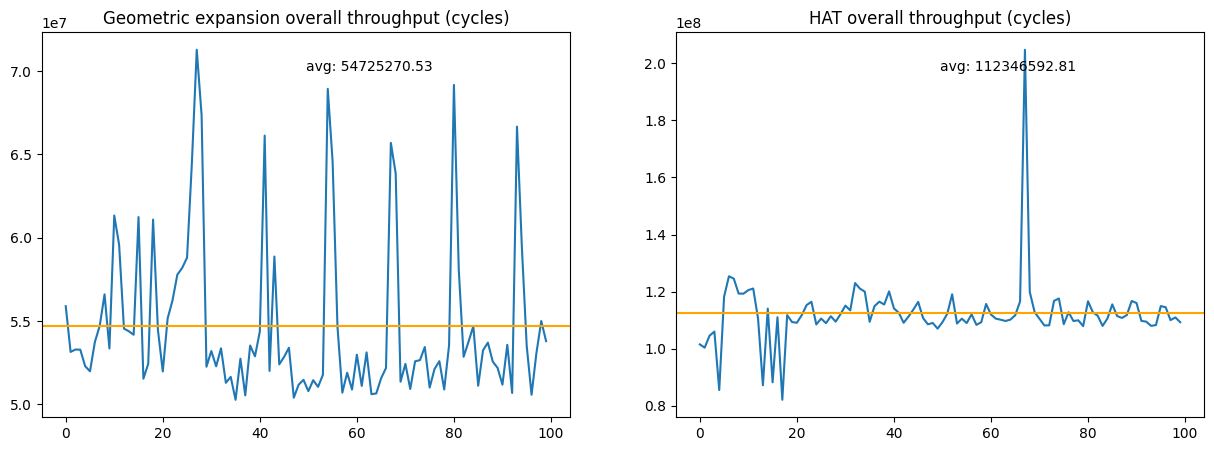

In [7]:
fig, ((ax2, ax3)) = plt.subplots(1, 2, figsize=(15, 5))
# fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

# ax1.plot(latencies["alpha_overall"])
# ax1.axhline(latencies["alpha_overall"].mean(), color="orange")
# ax1.set_title("Built-in Vec overall throughput (cycles)")
# ax1.text(0.1, 0.9, f'avg: {latencies["alpha_overall"].mean()}', transform=ax1.transAxes)

ax2.plot(latencies["double_overall"])
ax2.axhline(latencies["double_overall"].mean(), color="orange")
ax2.set_title("Geometric expansion overall throughput (cycles)")
ax2.text(0.5, 0.9, f'avg: {latencies["double_overall"].mean()}', transform=ax2.transAxes)

ax3.plot(latencies["hat_overall"])
ax3.axhline(latencies["hat_overall"].mean(), color="orange")
ax3.set_title("HAT overall throughput (cycles)")
ax3.text(0.5, 0.9, f'avg: {latencies["hat_overall"].mean()}', transform=ax3.transAxes)

fig.savefig("../report/graphics/01-overall-throughput.png", bbox_inches='tight')